# Titanic Data Set
## Import Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data


In [125]:
train = pd.read_csv('titanic_data.csv')

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  Exploring Data Analysis



In [127]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

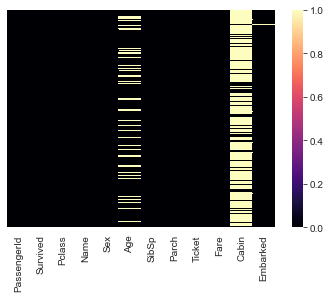

In [128]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='magma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

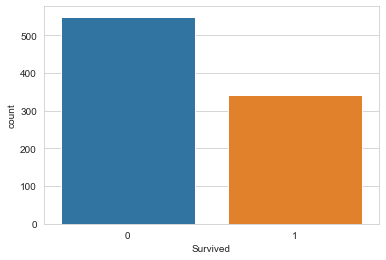

In [129]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

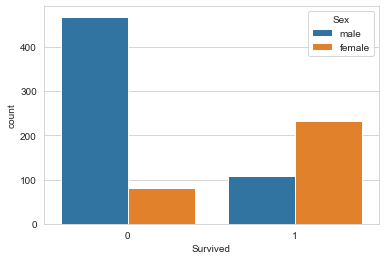

In [130]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

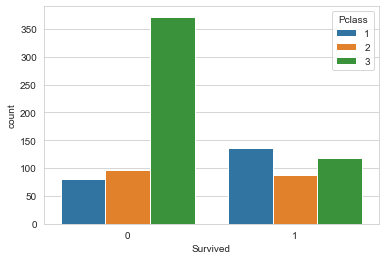

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

<AxesSubplot:>

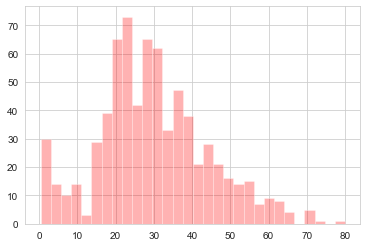

In [132]:
train['Age'].hist(bins=30,color='red',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

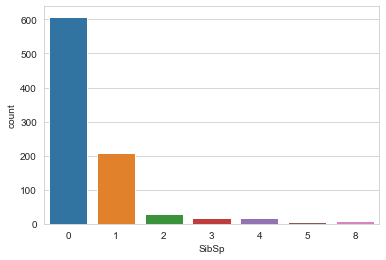

In [133]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

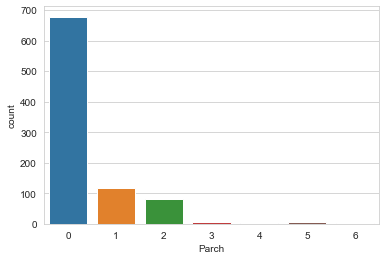

In [134]:
sns.countplot(x='Parch',data=train)

<AxesSubplot:>

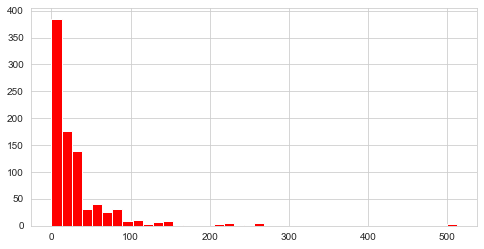

In [135]:
train['Fare'].hist(color='red',bins=40,figsize=(8,4))


## Data Cleaning and Data Preparation


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

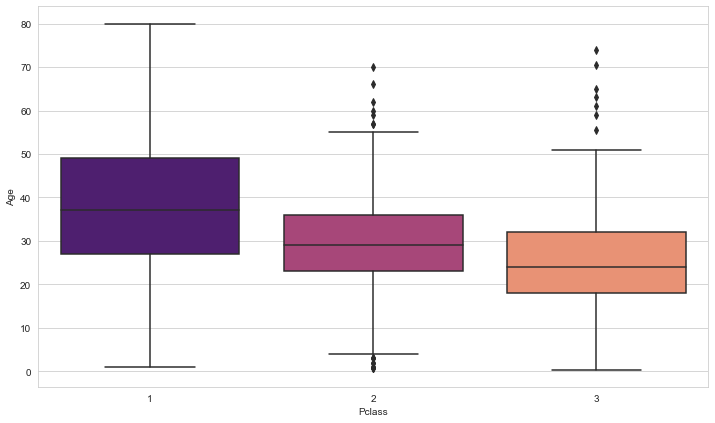

In [136]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='magma')

In [137]:
def ave_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [138]:
train['Age'] = train[['Age','Pclass']].apply(ave_age,axis=1)

In [139]:
train.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:>

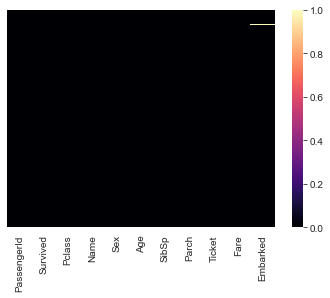

In [140]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='magma')

In [141]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [142]:
train.dropna(inplace=True)

<AxesSubplot:>

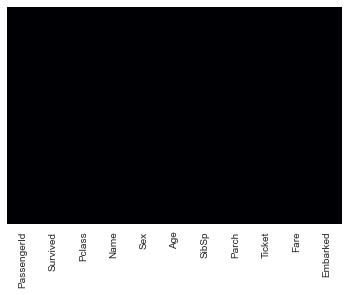

In [143]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [144]:
train.drop(['Name'],axis=1,inplace=True)

In [145]:
train.drop(['Ticket'],axis=1,inplace=True)

## Converting Categorical Features


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [147]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [148]:
pd.get_dummies(train['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [149]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [150]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [151]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [152]:
train = pd.concat([train,sex,embark],axis=1)

In [153]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Machine Learning model
### (Train Test Split)

In [154]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [155]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=101)

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 9)
(178, 9)
(711,)
(178,)


# Using Linear Regression

In [158]:
modele = LinearRegression()
modele.fit(X_train, y_train)

LinearRegression()

In [159]:
predicted = modele.predict(X_test)
predicted

array([ 0.11232131,  0.19364128,  0.72314847,  0.9513449 ,  0.19819804,
       -0.05804237,  0.12973235,  0.25286093,  0.06023725,  0.65157697,
        0.77000284,  1.01663988,  0.11700213,  0.60839507,  0.12411745,
        0.13663158,  0.92056414,  0.84503444,  0.57036174,  0.09101894,
        0.10096115,  0.07579248,  0.38857876,  0.33605609, -0.03832843,
        0.41929364,  0.51589958,  0.60330851,  0.07445183,  0.30207598,
        0.07255383,  0.367901  , -0.22845669,  0.09307969,  0.11233635,
        0.13712307,  0.73349643,  0.02766456,  0.1163778 ,  0.16198164,
        0.58318838,  0.16079696,  0.12405522,  0.93772555,  0.63370478,
        0.15161235,  0.63769594,  0.83807434,  0.08826502,  0.29756088,
        0.43839282,  0.77311251,  0.18667134,  0.14458296,  0.11541678,
        0.02868404,  0.39863415,  0.06935196,  0.06610131,  0.92574097,
        0.6497928 ,  0.96525273,  0.89828835,  0.08342557,  0.15853118,
       -0.01962472,  0.11608394,  0.41187427, -0.0060421 ,  0.14

In [160]:
print(r2_score(y_test, predicted) * 100)

43.75834272675956


# Using KNN Classification

## N = 3

In [161]:
model1 = KNeighborsClassifier(n_neighbors = 3)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [162]:
predict_y = model1.predict(X_test)

In [163]:
print(accuracy_score(y_test, predict_y))

0.6067415730337079


## N = 5

In [164]:
model1 = KNeighborsClassifier(n_neighbors = 5)
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [165]:
predict_y = model1.predict(X_test)

In [166]:
print(accuracy_score(y_test, predict_y))

0.6235955056179775


## N = 7

In [167]:
model1 = KNeighborsClassifier(n_neighbors = 7)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [168]:
predict_y = model1.predict(X_test)

In [169]:
print(accuracy_score(y_test, predict_y))

0.6573033707865169


# Using Logistic Regression

In [170]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ch.v.s.s.mani saketh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
logprediction = logmodel.predict(X_test)

In [172]:
logaccuracy = confusion_matrix(y_test,logprediction)

In [173]:
logaccuracy

array([[99,  8],
       [26, 45]], dtype=int64)

In [174]:
logaccuracy=accuracy_score(y_test,logprediction)
logaccuracy

0.8089887640449438

## Using Random Forest Classification

In [175]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [176]:
predictions = model.predict(X_test)

In [177]:
from sklearn.metrics import confusion_matrix


In [178]:

accuracy=confusion_matrix(y_test,predictions)

In [179]:
accuracy

array([[99,  8],
       [18, 53]], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8539325842696629

In [182]:
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

## Evaluation of Model which gave best accuracy (Random Forest Classification)

In [183]:
from sklearn.metrics import classification_report

In [184]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.87      0.75      0.80        71

    accuracy                           0.85       178
   macro avg       0.86      0.84      0.84       178
weighted avg       0.86      0.85      0.85       178

